# Still missing stuff:
* Chris Mathy's favorite performance metric is not used
* *Please add other things on this "to do list" that are missing*

# Loading packages

In [1]:
from functions import *
import cv2, keras
import numpy as np
import pandas as pd
from keras import layers
from keras.utils import np_utils
from keras.datasets import mnist
from scipy.signal import medfilt
from sklearn.preprocessing import normalize
from sklearn import svm, metrics, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing
* Load MNIST
* Binarize MNIST
* Perform steps of GoL on MNIST
* *Perform steps of other cellular automata*
* Show example of MNIST after GoL
* *Show example of MNIST after other cellular automata*
* Scale data

In [10]:
# Load data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Concatenate to a single dataset so that we may add validation set also
X = np.concatenate((train_X, test_X), axis=0)
y = np.concatenate((train_y, test_y), axis=0)

# Subset for faster processing
X = X[:1000]
y = y[:1000]

# Binarize (X, not y)
X_bina = np.array([make_binary(np.array(img.copy(), dtype=np.int32), 125) for img in X])

# Perform cellular automata
X_GoL = np.array([GoL(img, 3)[-1] for img in X_bina]) # Game of Life
# Add others here

# Min-max scaling
X = X/255.0
X_bina = X_bina/255.0
X_GoL = X_GoL/255.0

# Prepare lists for loop
feature_sets = [X, X_bina, X_GoL] # Add the other image processing types to this list
feature_set_names = ["X", "X_bina", "X_GoL"] # Add the other image processing types to this list

# Machine learning
* Perform LR, SVM and CNN on all feature sets
* Inspect example of performace

In [12]:
# Perform ML on the list of feature sets
performance = ML(feature_sets, feature_set_names, y)

In [22]:
# Inspect example of performance
performance["X"]["lr_performance"]["classification_report"]

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.400000,0.400000,0.333333,0.363636,0.222222,0.444444,0.444444,0.571429,0.333333,0.142857,0.39,0.365570,0.373475
recall,0.363636,0.500000,0.200000,0.400000,0.333333,0.400000,0.666667,0.571429,0.400000,0.071429,0.39,0.390649,0.390000
f1-score,0.380952,0.444444,0.250000,0.380952,0.266667,0.421053,0.533333,0.571429,0.363636,0.095238,0.39,0.370770,0.374176
support,11.000000,8.000000,10.000000,10.000000,6.000000,10.000000,12.000000,14.000000,5.000000,14.000000,0.39,100.000000,100.000000


In [23]:
# Get logistic regression classification reports for each feature set
for feature_set_name in feature_set_names:
    print(f"Classification report for {feature_set_name}: \n \n", performance[f"{feature_set_name}"]["lr_performance"]["classification_report"])

Classification report for X: 
 
                    0         1          2          3         4          5  \
precision   0.400000  0.400000   0.333333   0.363636  0.222222   0.444444   
recall      0.363636  0.500000   0.200000   0.400000  0.333333   0.400000   
f1-score    0.380952  0.444444   0.250000   0.380952  0.266667   0.421053   
support    11.000000  8.000000  10.000000  10.000000  6.000000  10.000000   

                   6          7         8          9  accuracy   macro avg  \
precision   0.444444   0.571429  0.333333   0.142857      0.39    0.365570   
recall      0.666667   0.571429  0.400000   0.071429      0.39    0.390649   
f1-score    0.533333   0.571429  0.363636   0.095238      0.39    0.370770   
support    12.000000  14.000000  5.000000  14.000000      0.39  100.000000   

           weighted avg  
precision      0.373475  
recall         0.390000  
f1-score       0.374176  
support      100.000000  
Classification report for X_bina: 
 
                    0  

# Extra stuff (potentially useful?)

## Test binarize and GoL functions on arbitrary image

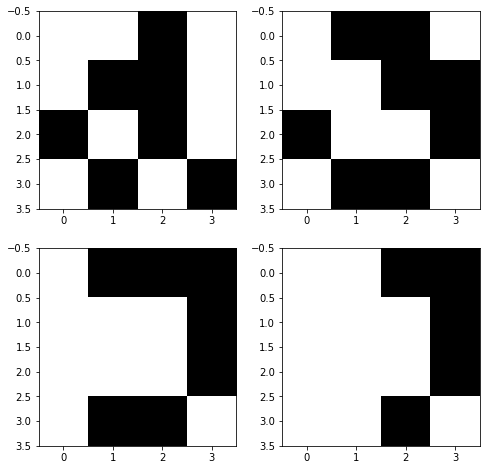

In [ ]:
# Set arbitrary seed
seed = np.array([[124, 34, 126, 0], [0, 255, 255, 74], [255, 0, 255, 0], [0, 170, 0, 178]])

# Binarize with threshold = 125
seed = make_binary(seed, 125)

# Perform 7 steps of GoL
generations = GoL(seed, 3)

# Plot generations
fig = plt.figure(figsize=(8, 8))
columns = len(generations)//2
rows = len(generations)//2
for i in range(1, len(generations)+1):
    generations[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(generations[i-1], cmap="gray_r")
plt.show()